In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [201]:
# Load the data from the Excel file
# Display the first few rows to understand the structure
df= pd.read_excel(r"C:\Users\nemile\Documents\project.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [202]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [155]:
# Check for duplicates
duplicates = df.duplicated().sum()
print('Number of duplicate rows:')
print(duplicates)

Number of duplicate rows:
5268


In [203]:
# Display data types
print('Data types of each column:')
print(df.dtypes)

Data types of each column:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [204]:
# Drop duplicate rows
df_cleaned = df.drop_duplicates()

In [205]:
# Fill missing values in 'Description' with 'Unknown'
df_cleaned['Description'] = df_cleaned['Description'].fillna('Unknown')

C:\Users\nemile\AppData\Local\Temp\ipykernel_13936\3801640169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Description'] = df_cleaned['Description'].fillna('Unknown')


In [206]:
# Drop rows with missing 'CustomerID' 
df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

In [207]:
# Display the cleaned dataset's first few rows and check for any remaining missing values
print(df_cleaned.head())
print('Remaining missing values in each column:')
print(df_cleaned.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Remaining missing values in each column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [208]:
#Spliting the Datetime to Months, Years and Day of week
df_cleaned['InvoiceDateMonth'] = df_cleaned['InvoiceDate'].dt.month 
df_cleaned['InvoiceDateYear'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['InvoiceDateDayofWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateMonth,InvoiceDateYear,InvoiceDateDayofWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2


In [209]:
# Calculate total sales for each product
df_cleaned['TotalSales']= df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateMonth,InvoiceDateYear,InvoiceDateDayofWeek,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34


In [210]:
# Group by date and calculate daily sales
daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()
daily_sales.head()

,InvoiceDate,TotalSales
0,2010-12-01,45867.26
1,2010-12-02,45656.47
2,2010-12-03,22553.38
3,2010-12-05,30970.28
4,2010-12-06,30258.77


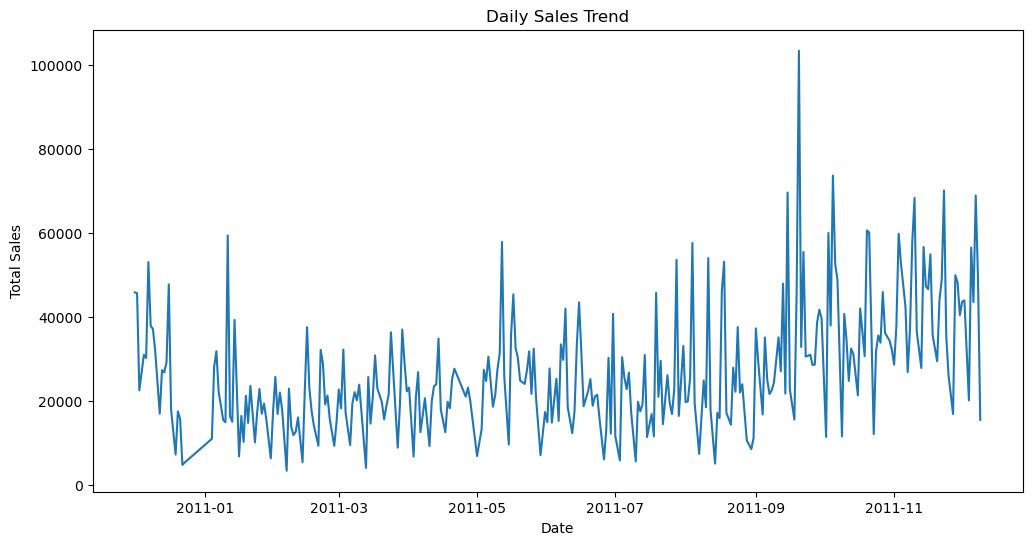

In [247]:
# Plot daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['TotalSales'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.savefig('daily_sales_trend.png')
plt.show()

In [212]:
#monthly sales
monthly_sales= df_cleaned.groupby(['InvoiceDateMonth'])['TotalSales'].sum()
monthly_sales

InvoiceDateMonth
1      473731.900
2      435534.070
3      578576.210
4      425222.671
5      647011.670
6      606862.520
7      573112.321
8      615078.090
9      929356.232
10     973306.380
11    1126815.070
12     893912.290
Name: TotalSales, dtype: float64

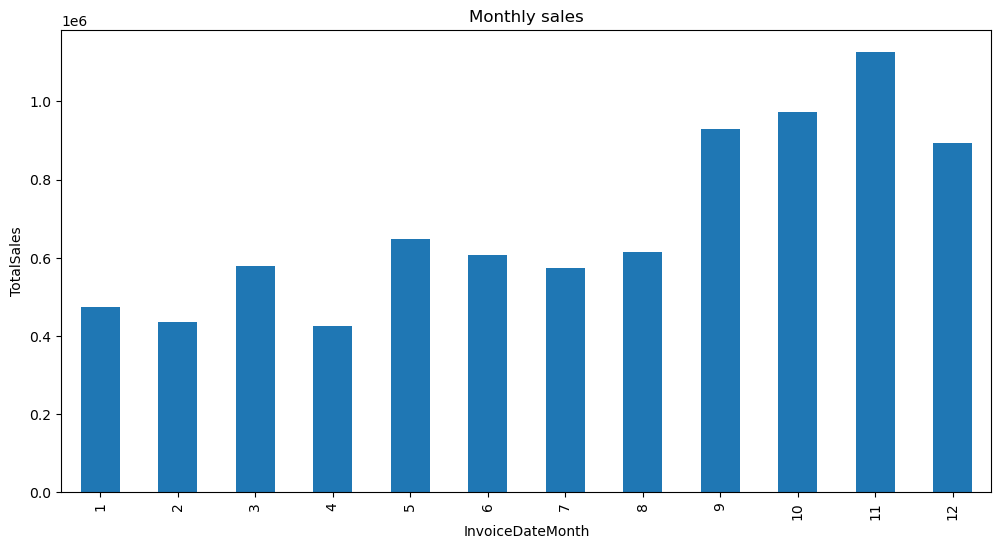

In [235]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly sales')
plt.xlabel('InvoiceDateMonth')
plt.ylabel('TotalSales')
plt.savefig('monthly sales.png')
plt.show()

In [213]:
#Yearly sales
yearly_sales= df_cleaned.groupby(['InvoiceDateYear'])['TotalSales'].sum()
yearly_sales

InvoiceDateYear
2010     552372.860
2011    7726146.564
Name: TotalSales, dtype: float64

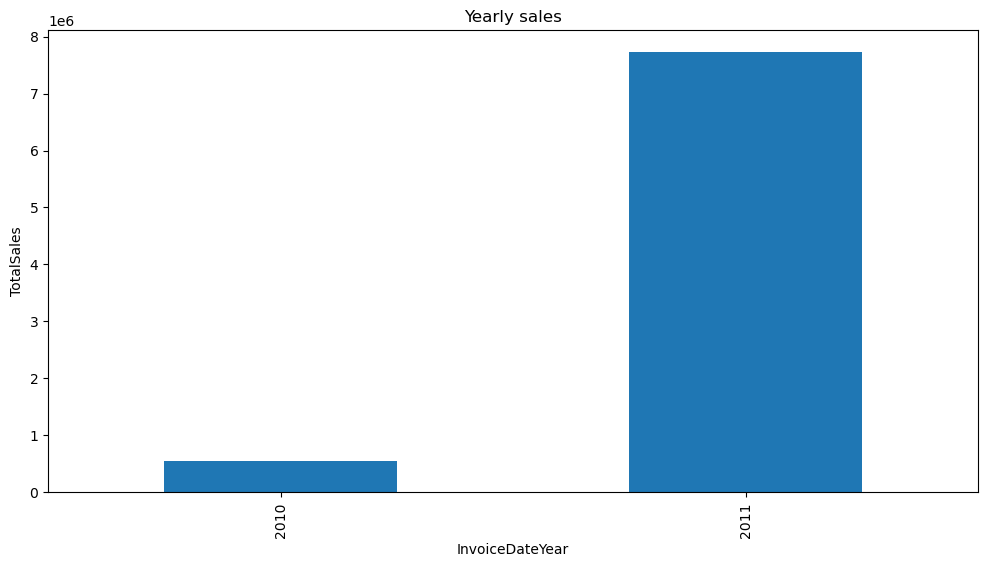

In [236]:
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar')
plt.title('Yearly sales')
plt.xlabel('InvoiceDateYear')
plt.ylabel('TotalSales')
plt.savefig('Yearly sales.png')
plt.show()

In [214]:
# Identify top 10 selling products
top_products = df_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

StockCode
84077     53119
22197     48689
85099B    44963
84879     35215
85123A    34185
21212     33386
23084     27045
22492     25880
22616     25305
21977     24129
Name: Quantity, dtype: int64

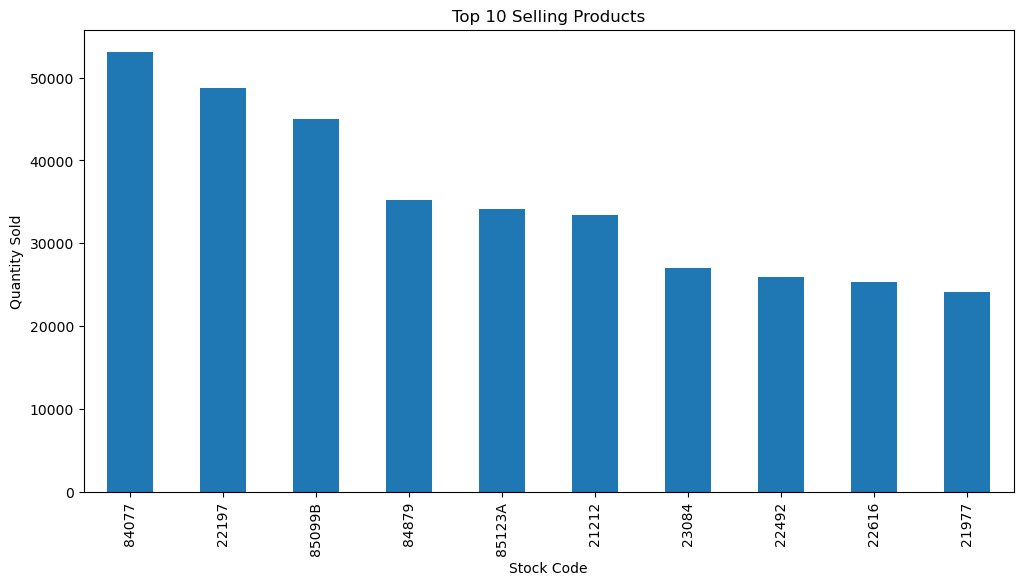

In [215]:
# Plot top 10 selling products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Stock Code')
plt.ylabel('Quantity Sold')
plt.savefig('top_10_products.png')
plt.show()

In [216]:
# Calculate revenue contribution by product
revenue_by_product = df_cleaned.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
revenue_by_product

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalSales, dtype: float64

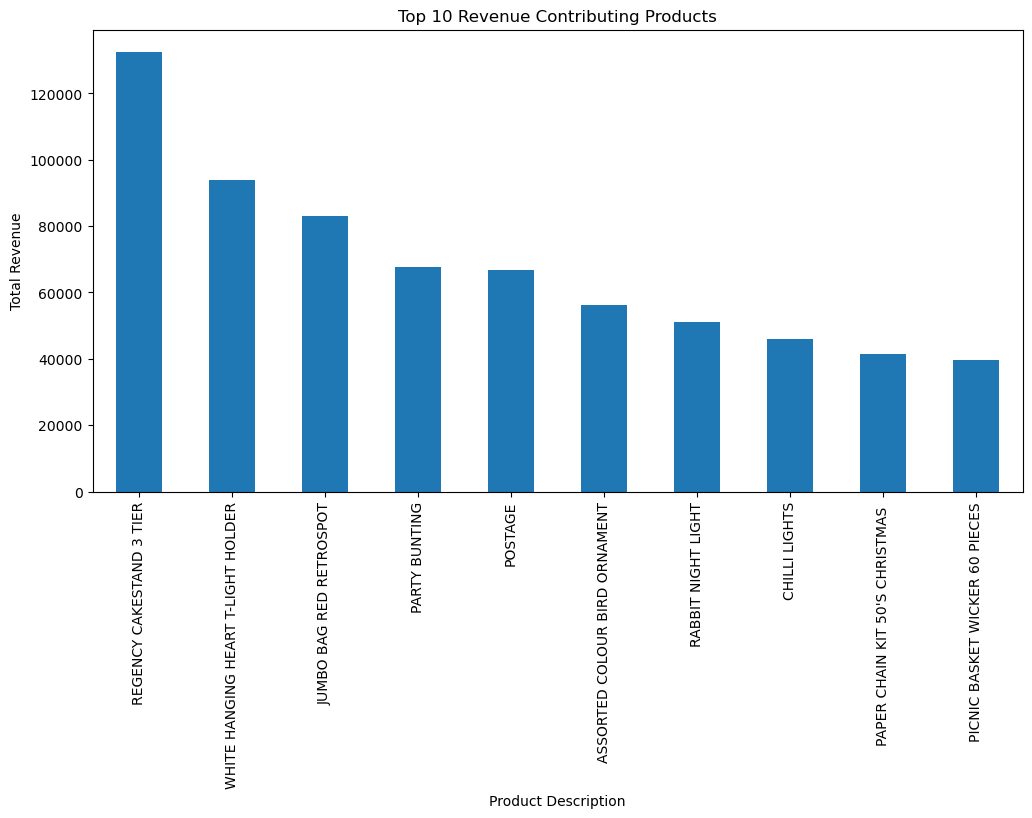

In [217]:
# Plot top 10 revenue contributing products
plt.figure(figsize=(12, 6))
revenue_by_product.plot(kind='bar')
plt.title('Top 10 Revenue Contributing Products')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.savefig('top_10_revenue_products.png')
plt.show()

In [239]:
customer_segmentation= df_cleaned.groupby(['CustomerID'])['TotalSales'].sum()
customer_segmentation.head(10)

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
12352.0    1545.41
12353.0      89.00
12354.0    1079.40
12355.0     459.40
12356.0    2811.43
Name: TotalSales, dtype: float64

In [219]:
customer_segmentation= df_cleaned.groupby(['CustomerID'])['Description'].sum()
customer_segmentation.head(10)

CustomerID
12346.0    MEDIUM CERAMIC TOP STORAGE JARMEDIUM CERAMIC T...
12347.0    BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...
12348.0    72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...
12349.0    PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...
12350.0    CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...
12352.0    WOODEN HAPPY BIRTHDAY GARLANDPINK DOUGHNUT TRI...
12353.0    CERAMIC CAKE STAND + HANGING CAKESMINI CAKE ST...
12354.0    JUMBO BAG ALPHABETCHARLOTTE BAG APPLES DESIGNC...
12355.0    GROW A FLYTRAP OR SUNFLOWER IN TINICE CREAM SU...
12356.0    BAKING SET 9 PIECE RETROSPOT WHITE HEART CONFE...
Name: Description, dtype: object

In [221]:
# Group by CustomerID and calculate metrics
df = df_cleaned.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'Quantity': 'sum',
    'InvoiceDate': lambda x: (x.max() - x.min())
})
df.columns = ['PurchaseFrequency', 'TotalSpending', 'CustomerLifespan']
df.head()

,PurchaseFrequency,TotalSpending,CustomerLifespan
CustomerID,,,
12346.0,2,0,0 days 00:16:00
12347.0,182,2458,365 days 00:55:00
12348.0,31,2341,282 days 18:04:00
12349.0,73,631,0 days 00:00:00
12350.0,17,197,0 days 00:00:00


In [224]:
# Analyzing repeat customers
customer_purchase_count = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_purchase_count.columns = ['CustomerID', 'PurchaseCount']

print("Repeat Customer Analysis:")
print(customer_purchase_count['PurchaseCount'].describe())


Repeat Customer Analysis:
count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: PurchaseCount, dtype: float64


C:\Users\nemile\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


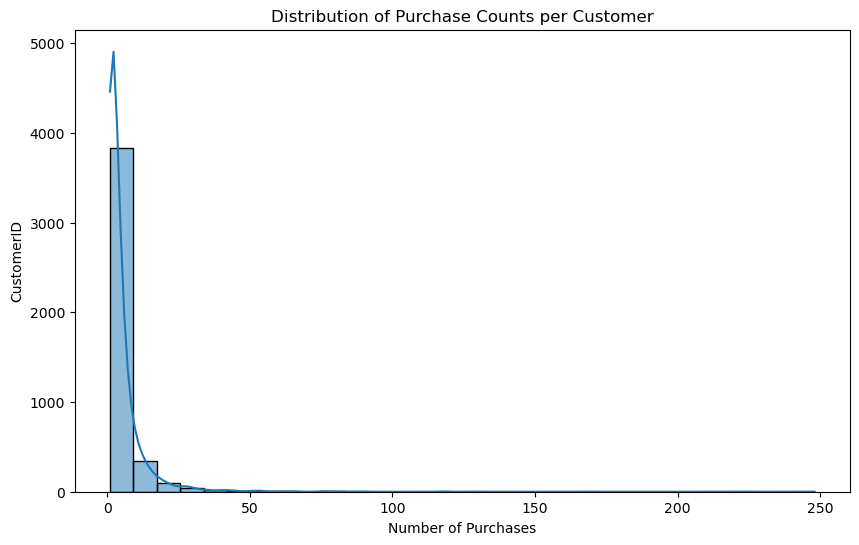

In [249]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_count['PurchaseCount'], bins=30, kde=True)
plt.title('Distribution of Purchase Counts per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('CustomerID')
plt.savefig('purchase_count_distribution.png')
plt.show()


In [226]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateMonth,InvoiceDateYear,InvoiceDateDayofWeek,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2,20.34


In [228]:
# Analyze sales distribution across countries
country_sales = df_cleaned.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
country_sales

Country
United Kingdom          6747156.154
Netherlands              284661.540
EIRE                     250001.780
Germany                  221509.470
France                   196626.050
Australia                137009.770
Switzerland               55739.400
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  28995.760
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6988.400
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2660.770
Malta                      2505.470
United Arab Emirates

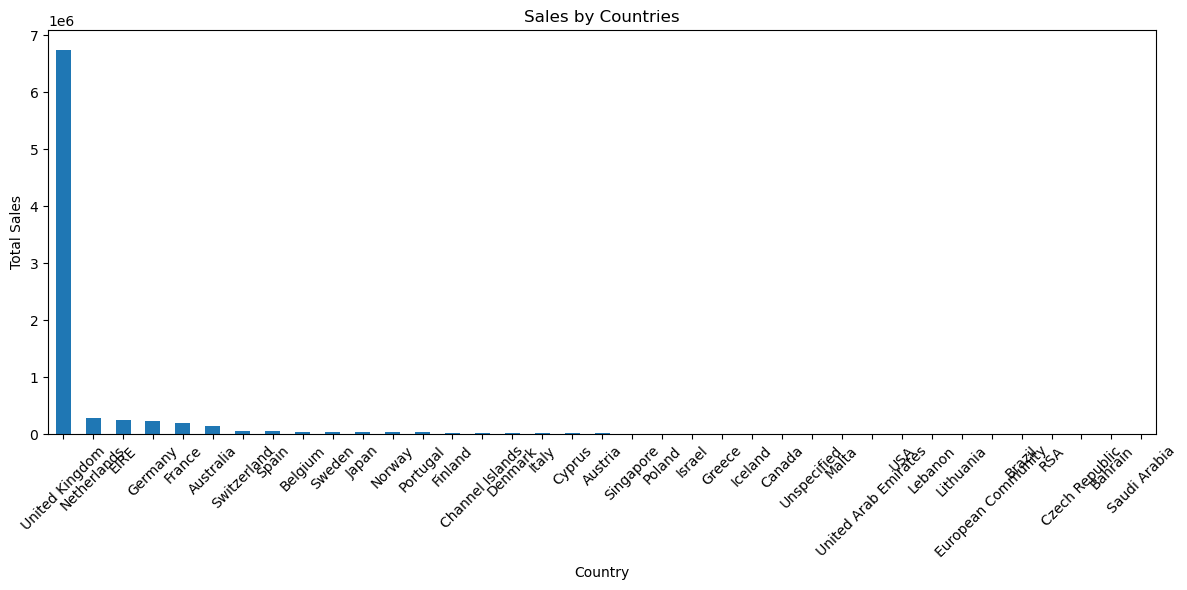

In [241]:

plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Sales by Countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('countries_sales.png')
plt.show()

In [264]:
# Product performance
# Group by 'StockCode' or 'Description' to calculate total sales volume and revenue
product_performance = df_cleaned.groupby(['StockCode']).agg({
    'Quantity': 'sum',
    'TotalSales': 'sum'
}).reset_index()
top_products = product_performance.sort_values(by='TotalSales', ascending=False)
top_products.head(10)

,StockCode,Quantity,TotalSales
1222,22423,11529,132567.70
3366,85123A,34185,93923.15
3360,85099B,44963,83056.52
2412,47566,15015,67628.43
3683,POST,3002,66710.24
2610,84879,35215,56331.91
1853,23084,27045,51042.84
1296,22502,1410,46963.10
2476,79321,9566,45915.41
919,22086,15138,41423.78


Text(0, 0.5, 'StockCode')

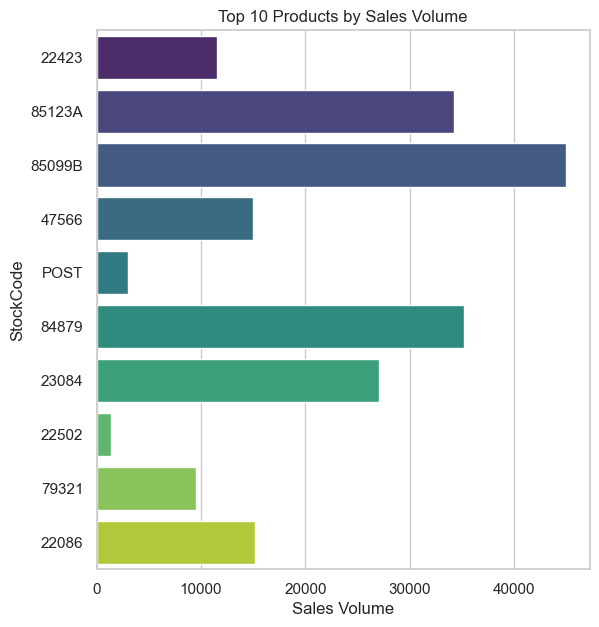

In [265]:
# Visualization
# Plotting Sales Volume
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Quantity', y='StockCode', data=top_products.head(10), palette='viridis')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('StockCode')

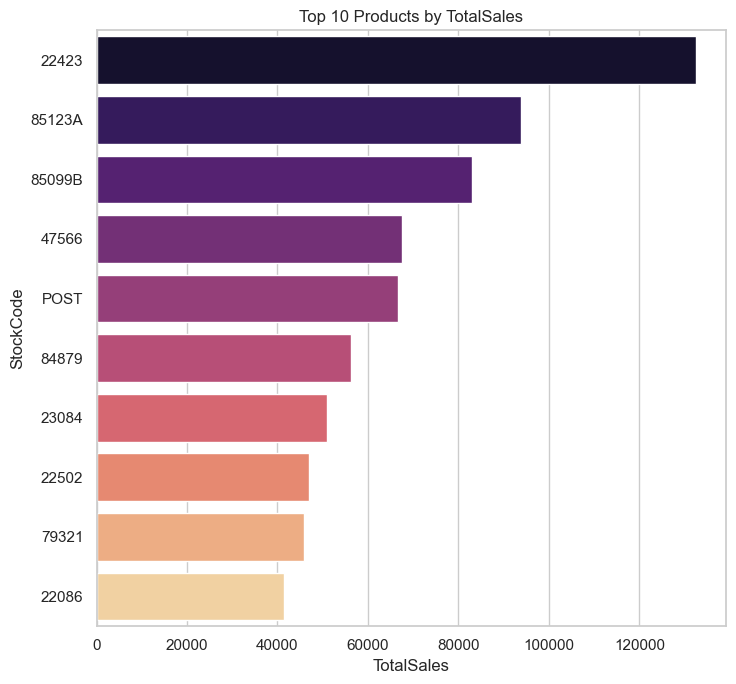

In [266]:
# Plotting Revenue
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)
sns.barplot(x='TotalSales', y='StockCode', data=top_products.head(10), palette='magma')
plt.title('Top 10 Products by TotalSales')
plt.xlabel('TotalSales')
plt.ylabel('StockCode')
plt.tight_layout()
plt.show()

In [285]:
# Calculate total quantity sold over time
sales_over_time = df_cleaned.groupby(['StockCode', pd.Grouper(key='InvoiceDate', freq='M')]).agg({
    'Quantity': 'sum'
}).reset_index()

sales_over_time.head(10)

,StockCode,InvoiceDate,Quantity
0,10002,2010-12-31,224
1,10002,2011-01-31,337
2,10002,2011-02-28,50
3,10002,2011-03-31,23
4,10002,2011-04-30,189
5,10080,2011-02-28,2
6,10080,2011-06-30,48
7,10080,2011-07-31,24
8,10080,2011-08-31,60
9,10080,2011-09-30,60


In [286]:
# Define threshold for fast-moving items (e.g., items with more than 100 units sold per month)
fast_moving_threshold = 100

In [291]:
#Calculating the average quantity sold per month for each item
average_sales_per_month = sales_over_time.groupby('StockCode')['Quantity'].mean().reset_index()
average_sales_per_month.head(10)

,StockCode,Quantity
0,10002,164.600000
1,10080,41.571429
2,10120,19.200000
3,10125,102.083333
4,10133,236.300000
5,10135,148.846154
6,11001,82.076923
7,15030,17.875000
8,15034,419.500000
9,15036,1625.538462


In [293]:
# Categorizing the items as fast-moving or slow-moving based on the threshold
average_sales_per_month['Category'] = average_sales_per_month['Quantity'].apply(
    lambda x: 'Fast-Moving' if x > fast_moving_threshold else 'Slow-Moving'
)

# Sort the items to see which ones are fast or slow moving
fast_moving_items = average_sales_per_month[average_sales_per_month['Category'] == 'Fast-Moving']
slow_moving_items = average_sales_per_month[average_sales_per_month['Category'] == 'Slow-Moving']


In [297]:
print("Fast-Moving Items:")
print(fast_moving_items)

print("\nSlow-Moving Items:")
print(slow_moving_items)

Fast-Moving Items:
     StockCode    Quantity     Category
0        10002  164.600000  Fast-Moving
3        10125  102.083333  Fast-Moving
4        10133  236.300000  Fast-Moving
5        10135  148.846154  Fast-Moving
8        15034  419.500000  Fast-Moving
...        ...         ...          ...
3422    85206A  228.500000  Fast-Moving
3425    85230B  105.333333  Fast-Moving
3426    85230E  110.100000  Fast-Moving
3681         M  226.461538  Fast-Moving
3683      POST  230.923077  Fast-Moving

[1196 rows x 3 columns]

Slow-Moving Items:
     StockCode   Quantity     Category
1        10080  41.571429  Slow-Moving
2        10120  19.200000  Slow-Moving
6        11001  82.076923  Slow-Moving
7        15030  17.875000  Slow-Moving
12       16010  10.000000  Slow-Moving
...        ...        ...          ...
3677        C2  10.230769  Slow-Moving
3678      CRUK  -3.200000  Slow-Moving
3679         D -91.846154  Slow-Moving
3680       DOT   3.200000  Slow-Moving
3682      PADS   1.333333  

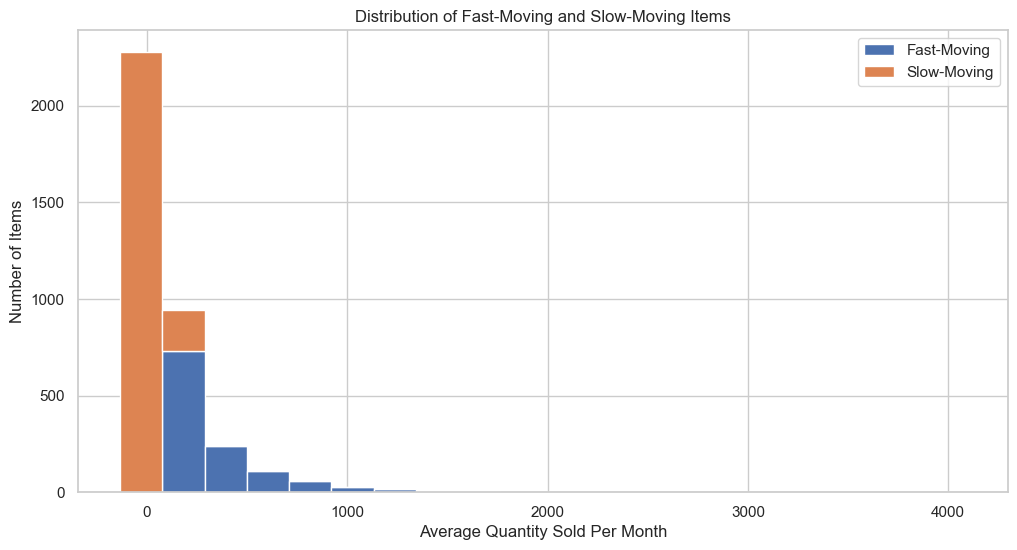

In [298]:
# Visualization of Fast-Moving vs. Slow-Moving Items
plt.figure(figsize=(12, 6))
plt.hist([fast_moving_items['Quantity'], slow_moving_items['Quantity']], bins=20, stacked=True, label=['Fast-Moving', 'Slow-Moving'])
plt.title('Distribution of Fast-Moving and Slow-Moving Items')
plt.xlabel('Average Quantity Sold Per Month')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [397]:
# Identify returns by filtering out rows with negative quantities
returns_df = df_cleaned[df_cleaned['Quantity'] < 0]
returns_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateMonth,InvoiceDateYear,InvoiceDateDayofWeek,TotalSales,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,2010,2,-27.50,2010-12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,2010,2,-4.65,2010-12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,2010,2,-19.80,2010-12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,2,-6.96,2010-12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,2,-6.96,2010-12


In [393]:
# Calculate the total number of returns for each product
returns_analysis = returns_df.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',          # Total quantity returned (will be negative)
    'InvoiceNo': 'count'        # Number of return transactions
}).reset_index()
returns_analysis.head()

,StockCode,Description,Quantity,InvoiceNo
0,10133,COLOURING PENCILS BROWN TUBE,-10,1
1,10135,COLOURING PENCILS BROWN TUBE,-1,1
2,11001,ASSTD DESIGN RACING CAR PEN,-185,5
3,15034,PAPER POCKET TRAVELING FAN,-1385,4
4,15036,ASSORTED COLOURS SILK FAN,-744,4


In [394]:
# Calculate the absolute value of the returned quantities for better readability
returns_analysis['TotalReturnedQuantity'] = returns_analysis['Quantity'].abs()

returns_analysis.head()

,StockCode,Description,Quantity,InvoiceNo,TotalReturnedQuantity
0,10133,COLOURING PENCILS BROWN TUBE,-10,1,10
1,10135,COLOURING PENCILS BROWN TUBE,-1,1,1
2,11001,ASSTD DESIGN RACING CAR PEN,-185,5,185
3,15034,PAPER POCKET TRAVELING FAN,-1385,4,1385
4,15036,ASSORTED COLOURS SILK FAN,-744,4,744


In [395]:
# Sort the products by the total quantity returned to identify the most returned products
returns_analysis = returns_analysis.sort_values(by='TotalReturnedQuantity', ascending=False)
returns_analysis.head(5)

,StockCode,Description,Quantity,InvoiceNo,TotalReturnedQuantity
1499,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,1,80995
1243,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74494,10,74494
1580,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9367,3,9367
1946,M,Manual,-3995,175,3995
115,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150,3,3150


In [396]:
# Analyzing monthly sales trends
monthly_sales = df_cleaned.groupby(['InvoiceDateYear', 'Month']).agg({
    'Quantity': 'sum',
    'TotalSales': 'sum'  
}).reset_index()
monthly_sales.head()

,InvoiceDateYear,Month,Quantity,TotalSales
0,2010,2010-12,295177,552372.860
1,2011,2011-01,268755,473731.900
2,2011,2011-02,262243,435534.070
3,2011,2011-03,343095,578576.210
4,2011,2011-04,277730,425222.671


C:\Users\nemile\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


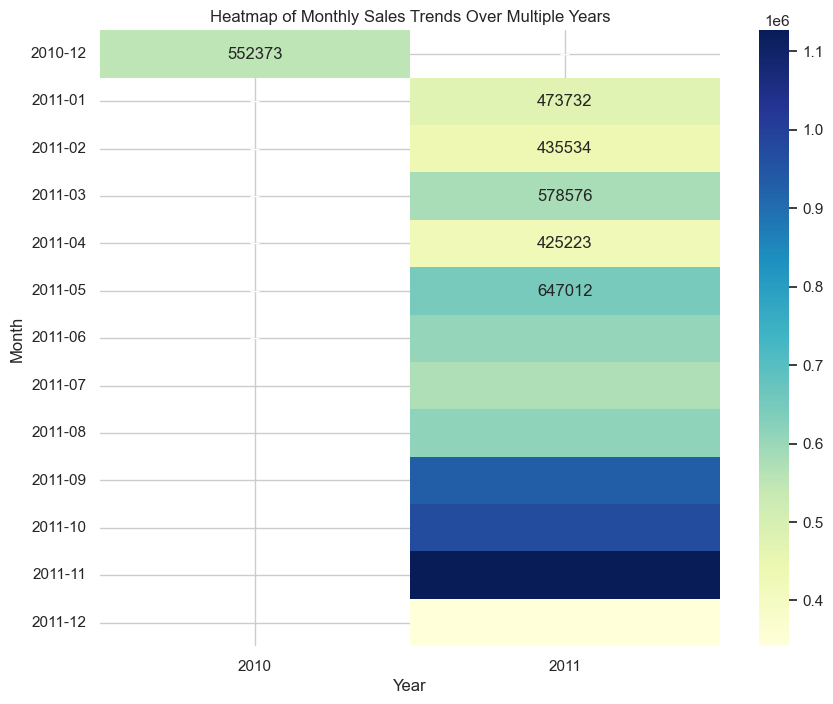

In [321]:
# visualize monthly sales trends across different years
pivot_table = monthly_sales.pivot(index='Month', columns='InvoiceDateYear', values='TotalSales')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Monthly Sales Trends Over Multiple Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [323]:
# Analyze weekly trends
weekday_sales = df_cleaned.groupby(['InvoiceDateDayofWeek']).agg({
    'Quantity': 'sum',
    'TotalSales': 'sum'
}).reset_index()
weekday_sales

,InvoiceDateDayofWeek,Quantity,TotalSales
0,0,739603,1271078.601
1,1,912081,1562715.681
2,2,938243,1526440.000
3,3,1115666,1902316.050
4,4,729508,1238556.741
5,6,457750,777412.351


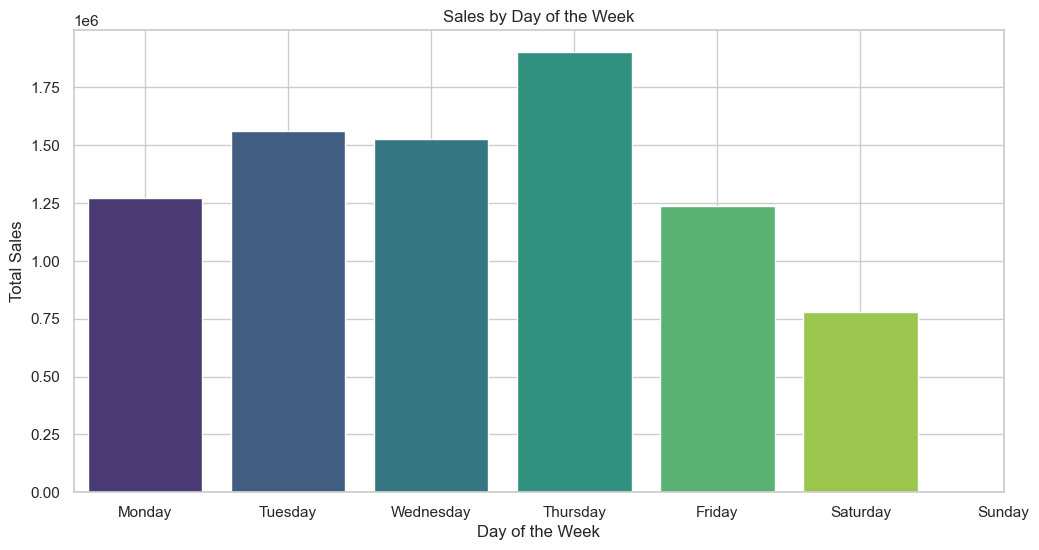

In [324]:
# Plot weekly sales trends
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_sales, x='InvoiceDateDayofWeek', y='TotalSales', palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

In [330]:
# Calculate total sales and quantity for each country
country_sales = df_cleaned.groupby('Country').agg({
    'Quantity': 'sum',       
    'TotalSales': 'sum'      
}).reset_index()

# Sort countries by total sales to identify key markets
country_sales = country_sales.sort_values(by='TotalSales', ascending=False)
country_sales.head(10)

,Country,Quantity,TotalSales
35,United Kingdom,3994870,6747156.154
23,Netherlands,200128,284661.540
10,EIRE,136187,250001.780
14,Germany,117341,221509.470
13,France,109806,196626.050
0,Australia,83643,137009.770
32,Switzerland,29778,55739.400
30,Spain,26817,54756.030
3,Belgium,23152,40910.960
31,Sweden,35632,36585.410


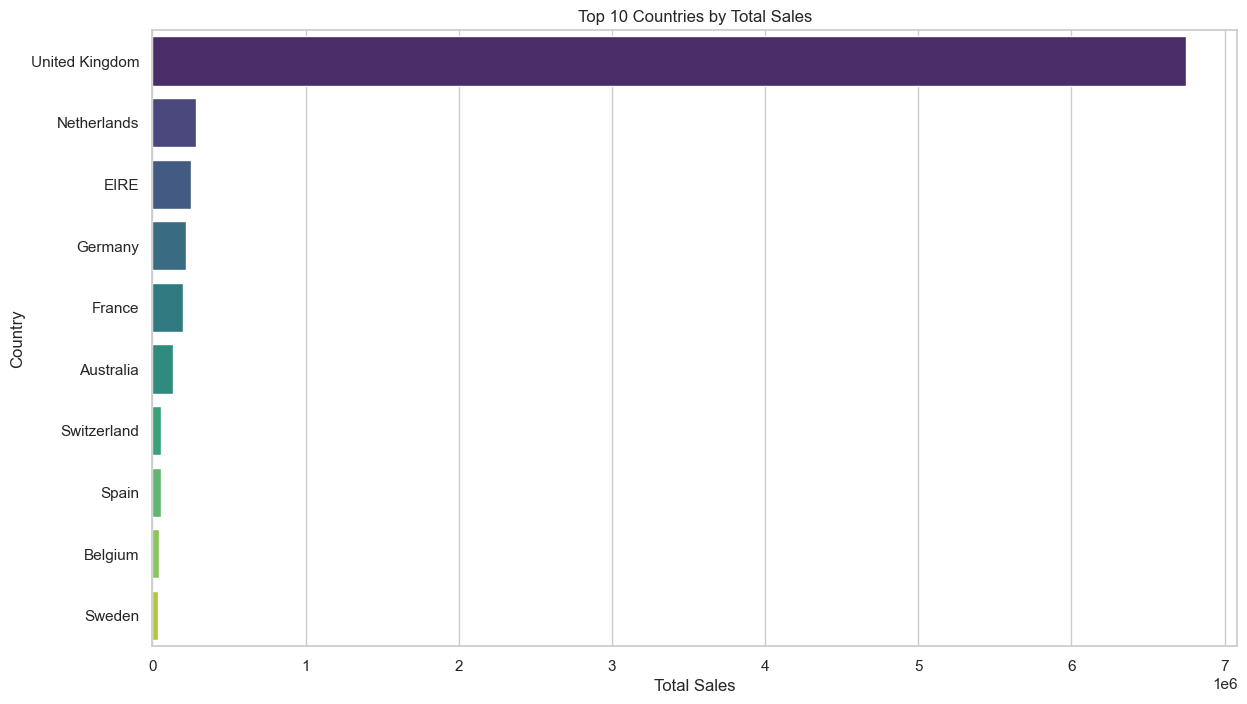

In [331]:
# Visualization 1: Bar plot of total sales by country (Top 10)
plt.figure(figsize=(14, 8))
sns.barplot(data=country_sales.head(10), x='TotalSales', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


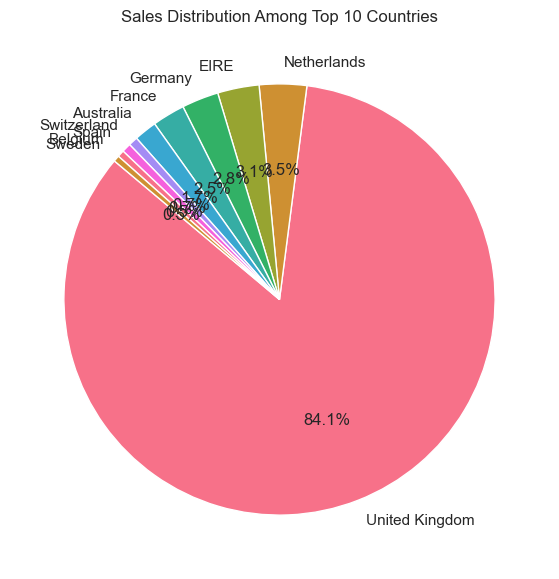

In [333]:
# Pie # piechart to show the distribution of sales across the top 10 countries
plt.figure(figsize=(10, 7))
plt.pie(country_sales['TotalSales'].head(10), labels=country_sales['Country'].head(10), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 8))
plt.title('Sales Distribution Among Top 10 Countries')
plt.show()

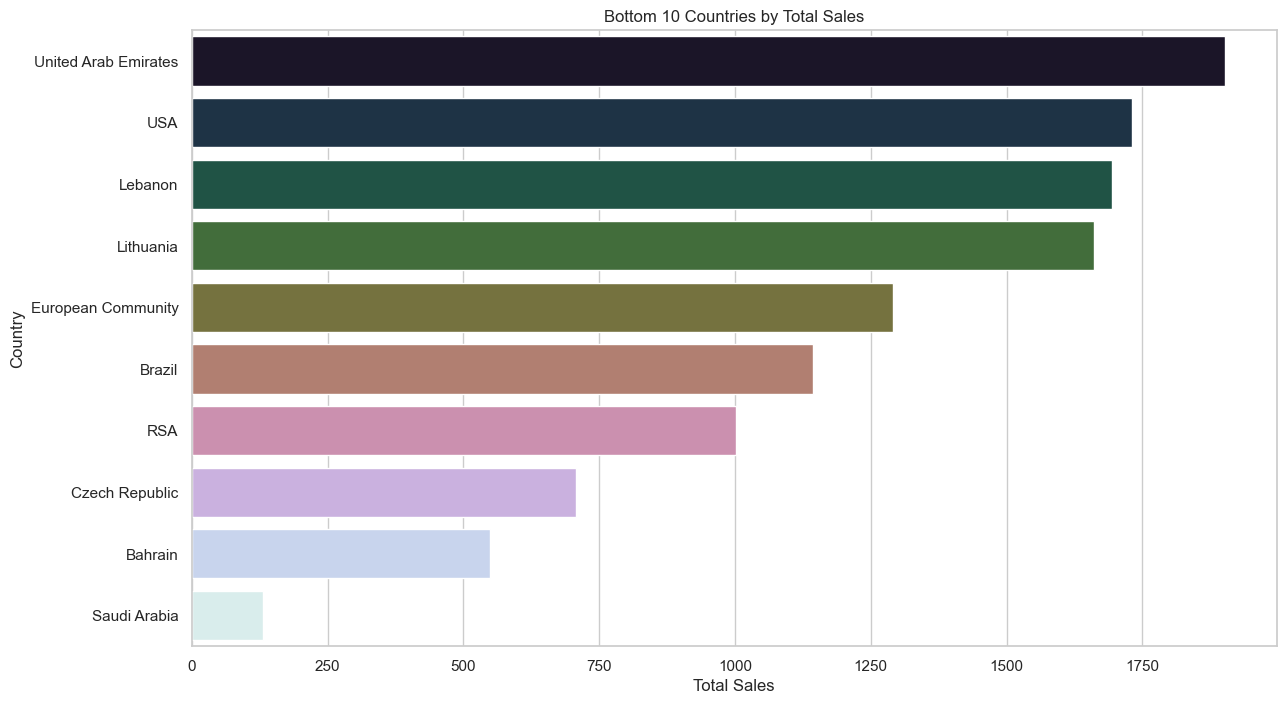

In [334]:
# Visualization of the bottom 10 countries by sales
plt.figure(figsize=(14, 8))
sns.barplot(data=country_sales.tail(10), x='TotalSales', y='Country', palette='cubehelix')
plt.title('Bottom 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

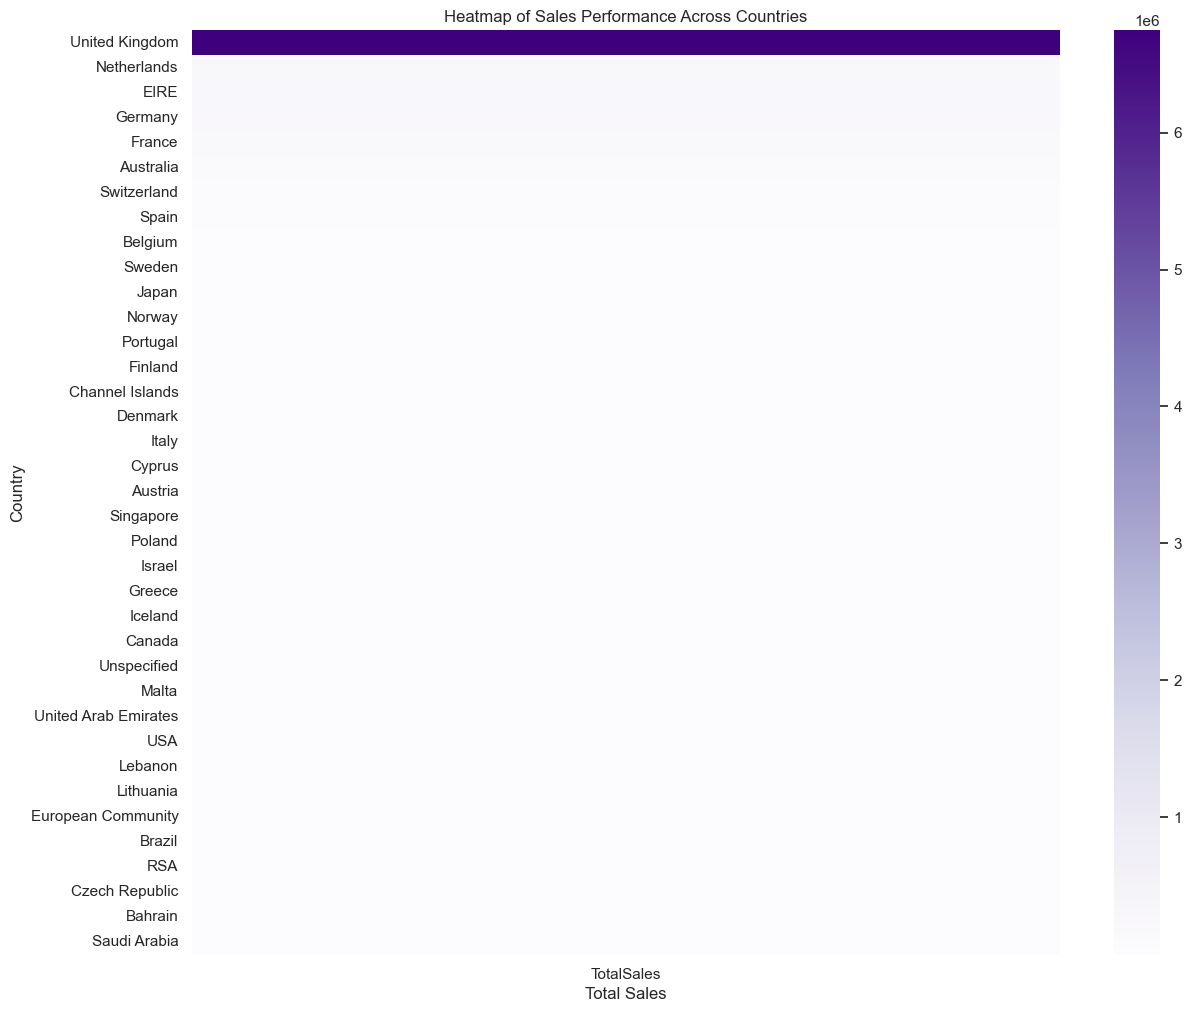

In [336]:
# Heatmap to visualize sales performance across all countries
plt.figure(figsize=(14, 12))
sns.heatmap(country_sales.pivot_table(values='TotalSales', index='Country', aggfunc='sum').sort_values(by='TotalSales', ascending=False), cmap='Purples', annot=False, cbar=True)
plt.title('Heatmap of Sales Performance Across Countries')
plt.ylabel('Country')
plt.xlabel('Total Sales')
plt.show()

In [338]:
# Calculate the number of unique customers in each country
unique_customers = df_cleaned.groupby('Country')['CustomerID'].nunique().reset_index()
unique_customers.columns = ['Country', 'UniqueCustomers']
unique_customers.head()

,Country,UniqueCustomers
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1


In [340]:
# Calculate total sales in each country
total_sales = df_cleaned.groupby('Country')['TotalSales'].sum().reset_index()


In [341]:
# Merge the two datasets to get both unique customers and total sales by country
penetration_analysis = pd.merge(unique_customers, total_sales, on='Country')


In [346]:
# Sort countries by the number of unique customers to identify key markets
penetration_analysis = penetration_analysis.sort_values(by='UniqueCustomers', ascending=False)

penetration_analysis.head(10)

,Country,UniqueCustomers,TotalSales
35,United Kingdom,3950,6747156.154
14,Germany,95,221509.470
13,France,87,196626.050
30,Spain,31,54756.030
3,Belgium,25,40910.960
32,Switzerland,21,55739.400
26,Portugal,19,28995.760
18,Italy,15,16890.510
12,Finland,12,22326.740
1,Austria,11,10154.320


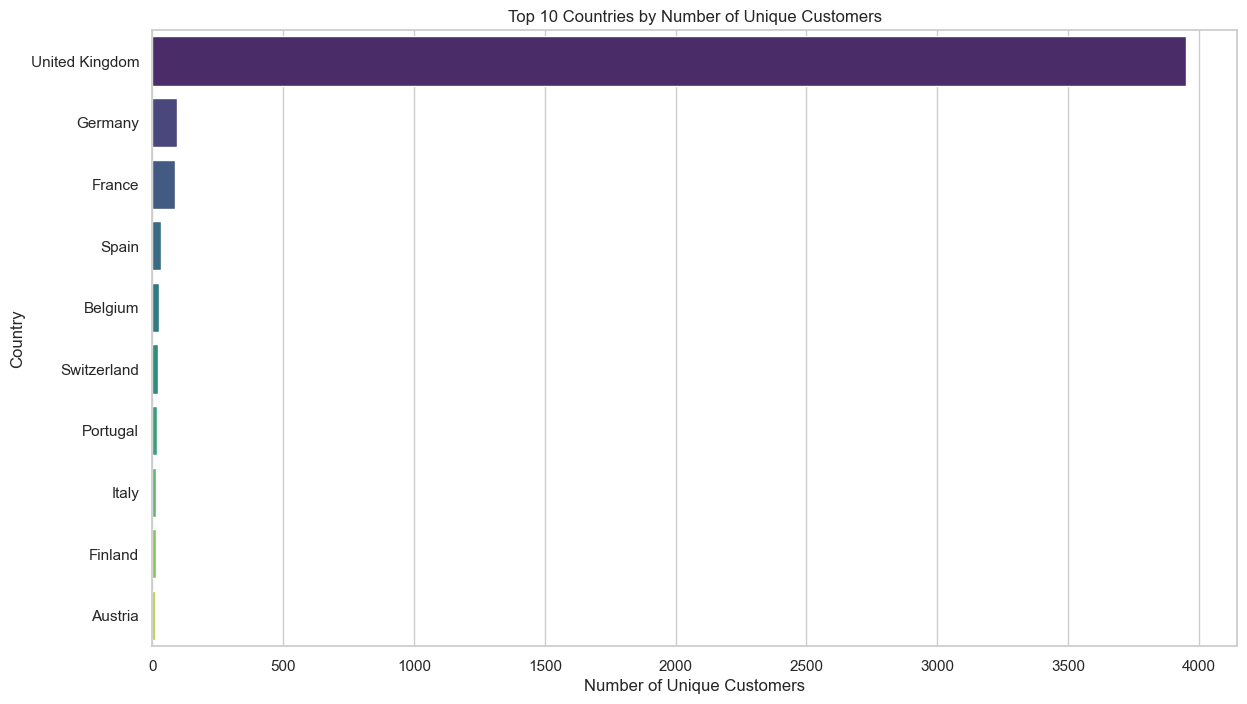

In [347]:
# Visualization of unique customers by country (Top 10)
plt.figure(figsize=(14, 8))
sns.barplot(data=penetration_analysis.head(10), x='UniqueCustomers', y='Country', palette='viridis')
plt.title('Top 10 Countries by Number of Unique Customers')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Country')
plt.show()

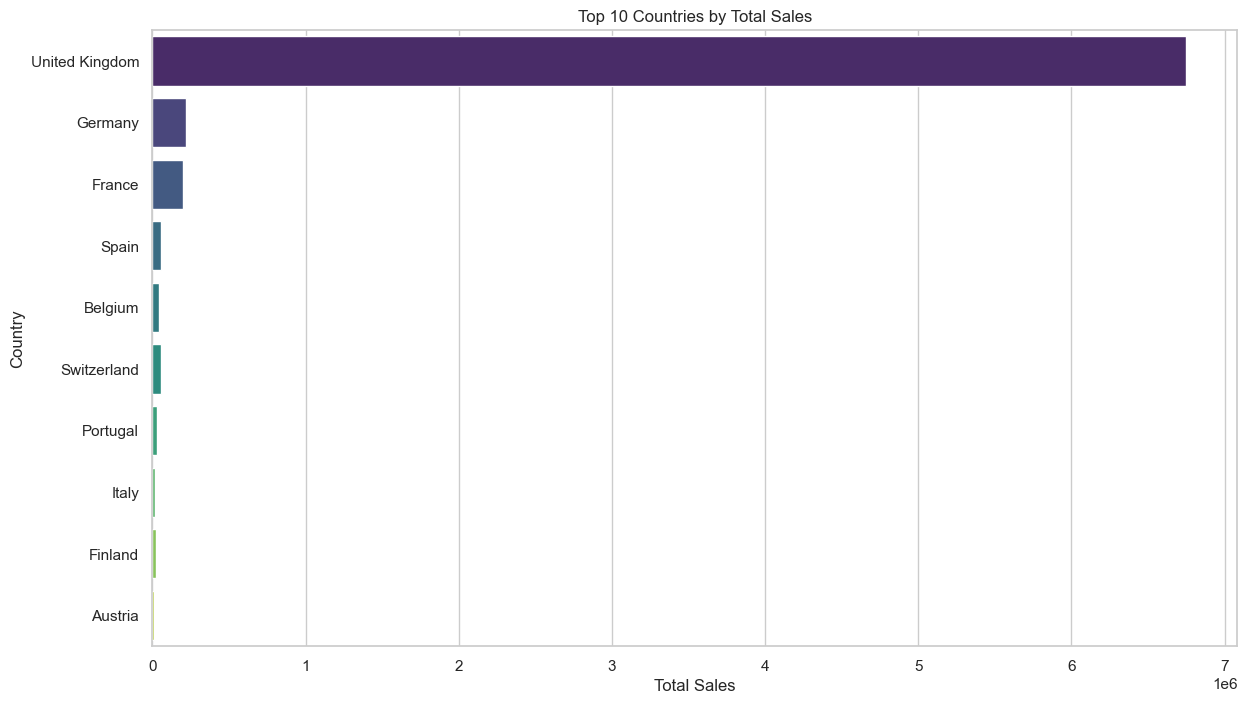

In [348]:
# Visualization of total sales by country (Top 10)
plt.figure(figsize=(14, 8))
sns.barplot(data=penetration_analysis.head(10), x='TotalSales', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

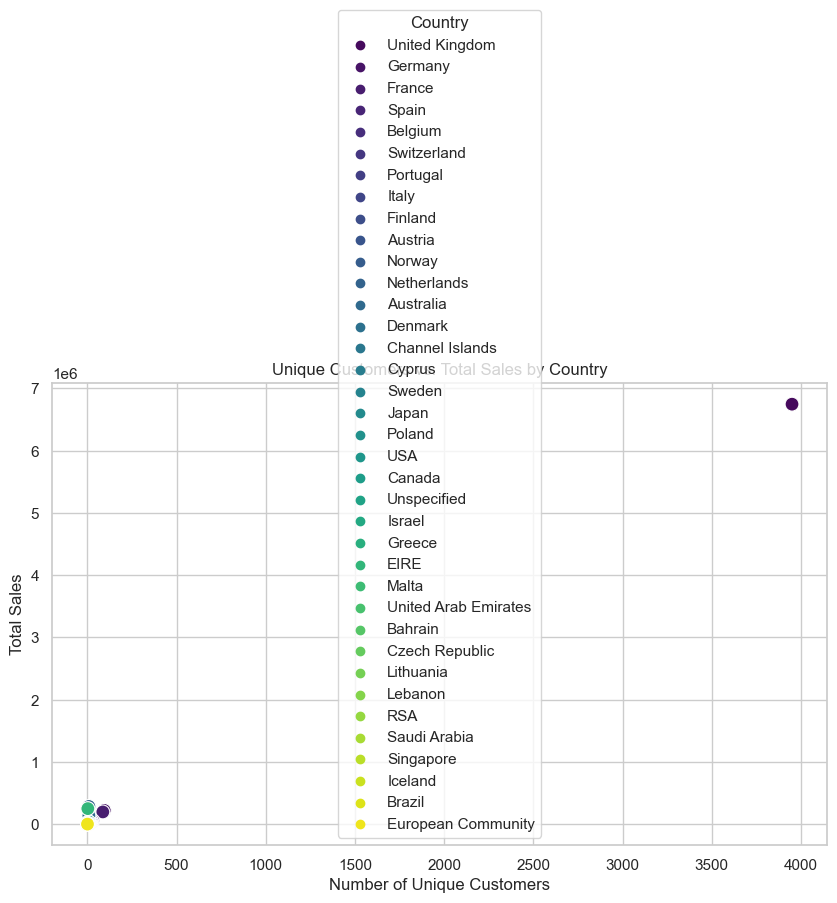

In [355]:
# Visualization of unique customers vs. total sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penetration_analysis, x='UniqueCustomers', y='TotalSales', hue='Country', palette='viridis', s=100)
plt.title('Unique Customers vs. Total Sales by Country')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Total Sales')
plt.show()

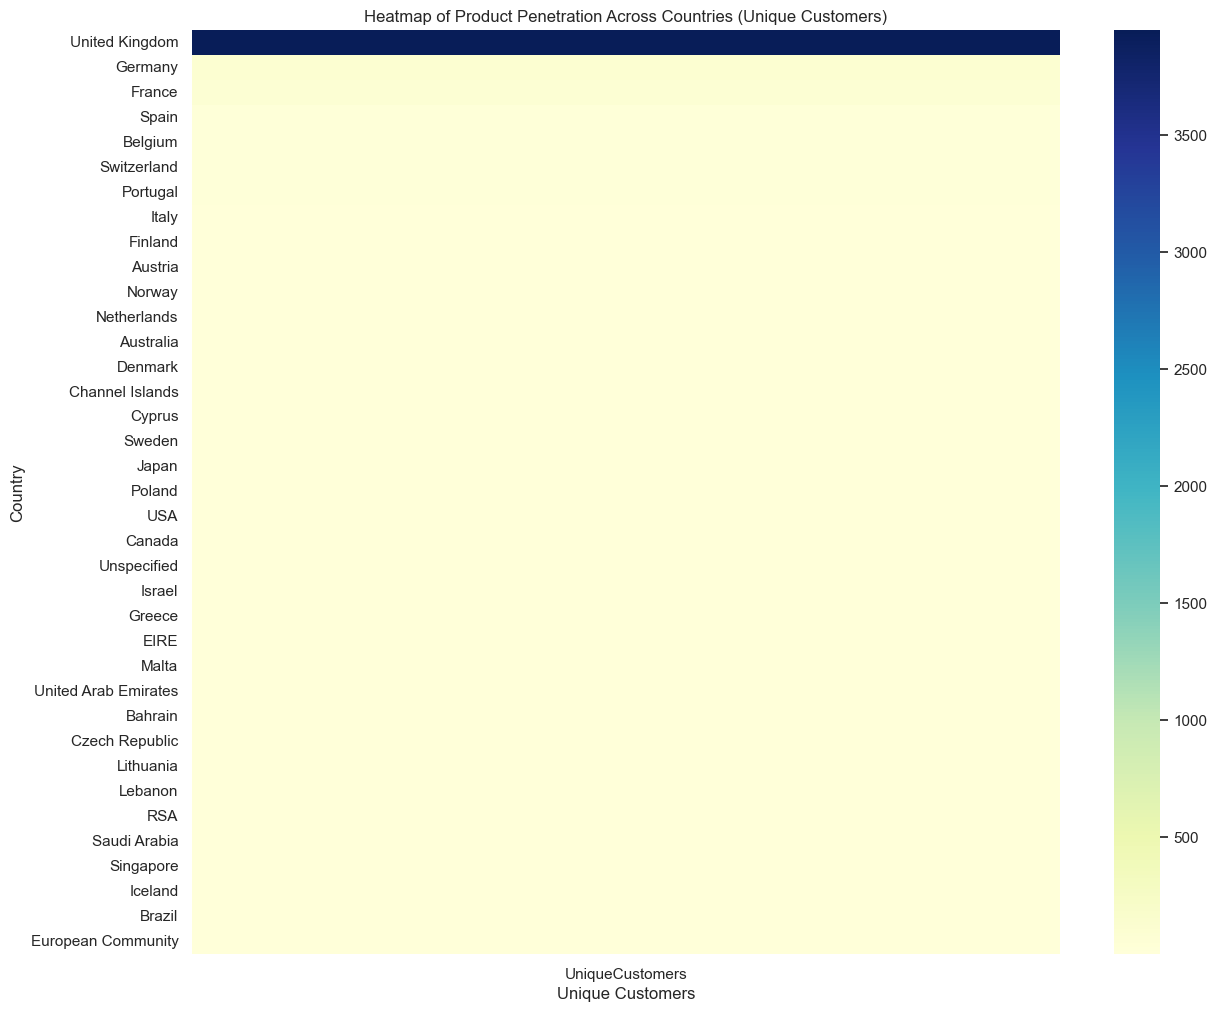

In [353]:
# visualizing penetration across all countries
plt.figure(figsize=(14, 12))
sns.heatmap(penetration_analysis.pivot_table(values='UniqueCustomers', index='Country', aggfunc='sum').sort_values(by='UniqueCustomers', ascending=False), cmap='YlGnBu', annot=False, cbar=True)
plt.title('Heatmap of Product Penetration Across Countries (Unique Customers)')
plt.ylabel('Country')
plt.xlabel('Unique Customers')
plt.show()

In [362]:
# Calculate total sales and the number of invoices
total_sales = df_cleaned['TotalSales'].sum()
num_invoices = df_cleaned['InvoiceNo'].nunique()


In [366]:
# Calculating the Average Order Value (AOV)
average_order_value = total_sales / num_invoices
print(f"Average Order Value (AOV): ${average_order_value:.2f}")

Average Order Value (AOV): $373.07


In [369]:
# Grouping by InvoiceNo to calculate the AOV for each invoice
invoice_aov = df_cleaned.groupby('InvoiceNo')['TotalSales'].sum().reset_index()
invoice_aov.head()

,InvoiceNo,TotalSales
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


C:\Users\nemile\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


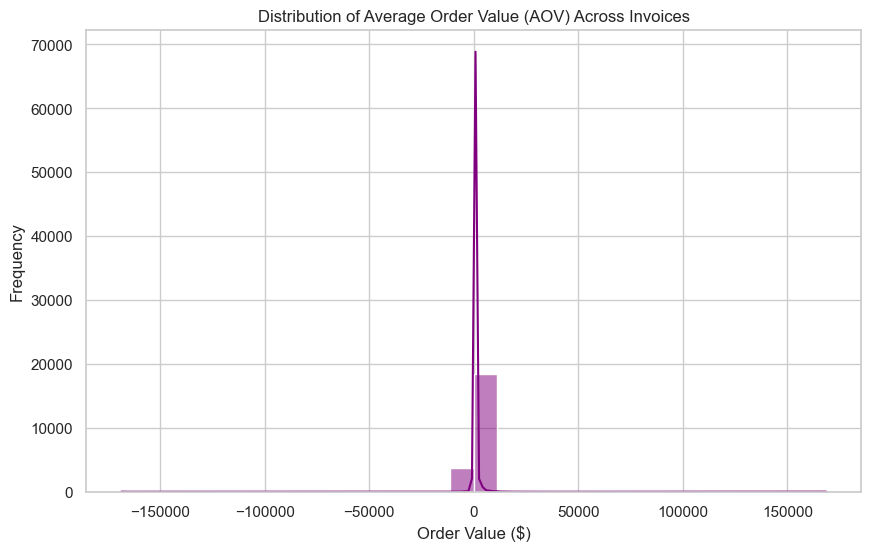

In [370]:
# Visualization of the Distribution of AOV across all invoices
plt.figure(figsize=(10, 6))
sns.histplot(invoice_aov['TotalSales'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Order Value (AOV) Across Invoices')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.show()


In [371]:
# Frequency of Orders by country
country_aov = df_cleaned.groupby('Country').agg({
    'TotalSales': 'sum',   # Total sales in each country
    'InvoiceNo': 'nunique' # Number of invoices in each country
}).reset_index()
country_aov.head()

,Country,TotalSales,InvoiceNo
0,Australia,137009.77,69
1,Austria,10154.32,19
2,Bahrain,548.40,2
3,Belgium,40910.96,119
4,Brazil,1143.60,1


In [374]:
# Calculate AOV for each country
country_aov['AverageOrderValue'] = country_aov['TotalSales'] / country_aov['InvoiceNo']
country_aov.head()

,Country,TotalSales,InvoiceNo,AverageOrderValue
0,Australia,137009.77,69,1985.648841
1,Austria,10154.32,19,534.437895
2,Bahrain,548.40,2,274.200000
3,Belgium,40910.96,119,343.789580
4,Brazil,1143.60,1,1143.600000


In [377]:
# Sort countries by AOV
country_aov = country_aov.sort_values(by='AverageOrderValue', ascending=False)
country_aov.head()

,Country,TotalSales,InvoiceNo,AverageOrderValue
23,Netherlands,284661.54,101,2818.431089
0,Australia,137009.77,69,1985.648841
20,Lebanon,1693.88,1,1693.880000
19,Japan,35340.62,28,1262.165000
17,Israel,6988.40,6,1164.733333


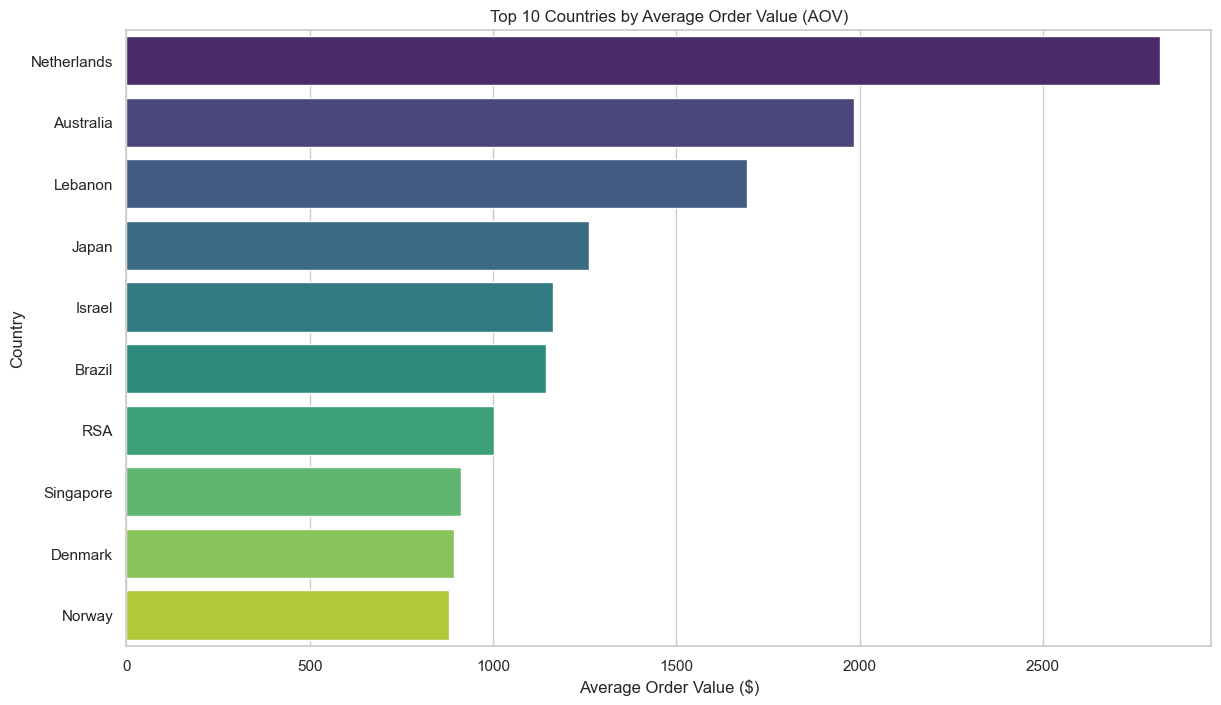

In [378]:
# Visualization of AOV by country (Top 10)
plt.figure(figsize=(14, 8))
sns.barplot(data=country_aov.head(10), x='AverageOrderValue', y='Country', palette='viridis')
plt.title('Top 10 Countries by Average Order Value (AOV)')
plt.xlabel('Average Order Value ($)')
plt.ylabel('Country')
plt.show()

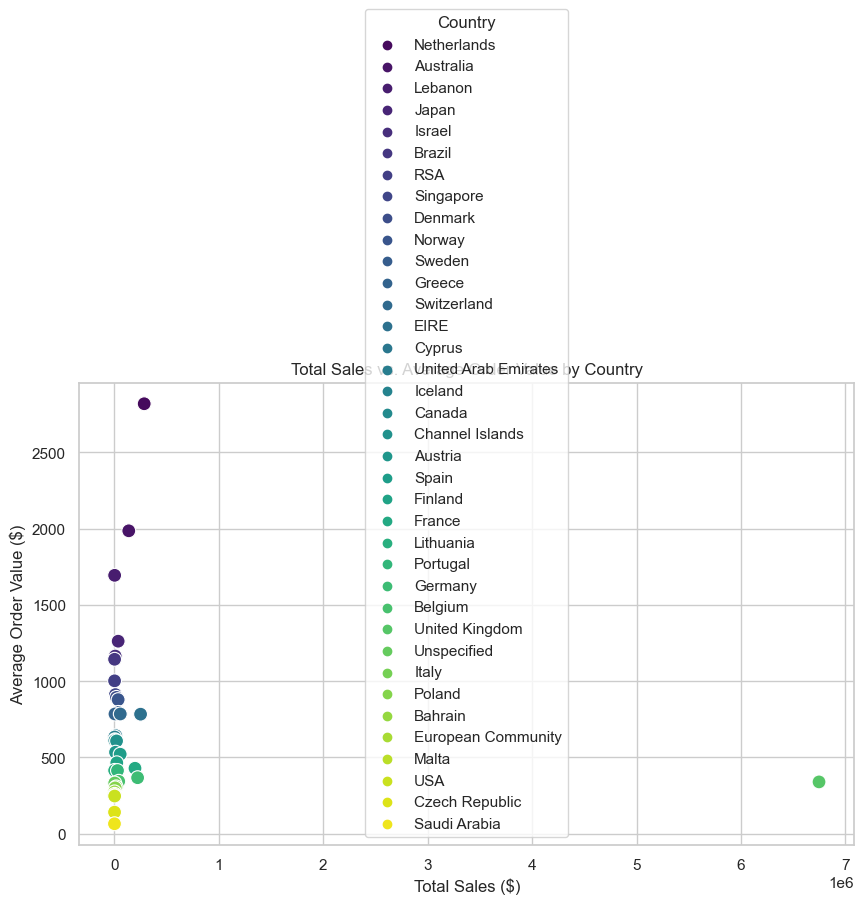

In [379]:
# Visualization of total sales vs. AOV by country
plt.figure(figsize=(10, 6))
sns.scatterplot(data=country_aov, x='TotalSales', y='AverageOrderValue', hue='Country', palette='viridis', s=100)
plt.title('Total Sales vs. Average Order Value by Country')
plt.xlabel('Total Sales ($)')
plt.ylabel('Average Order Value ($)')
plt.show()

In [381]:
# Calculate the number of orders per customer
customer_order_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_order_frequency.columns = ['CustomerID', 'OrderFrequency']
customer_order_frequency.head()

,CustomerID,OrderFrequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


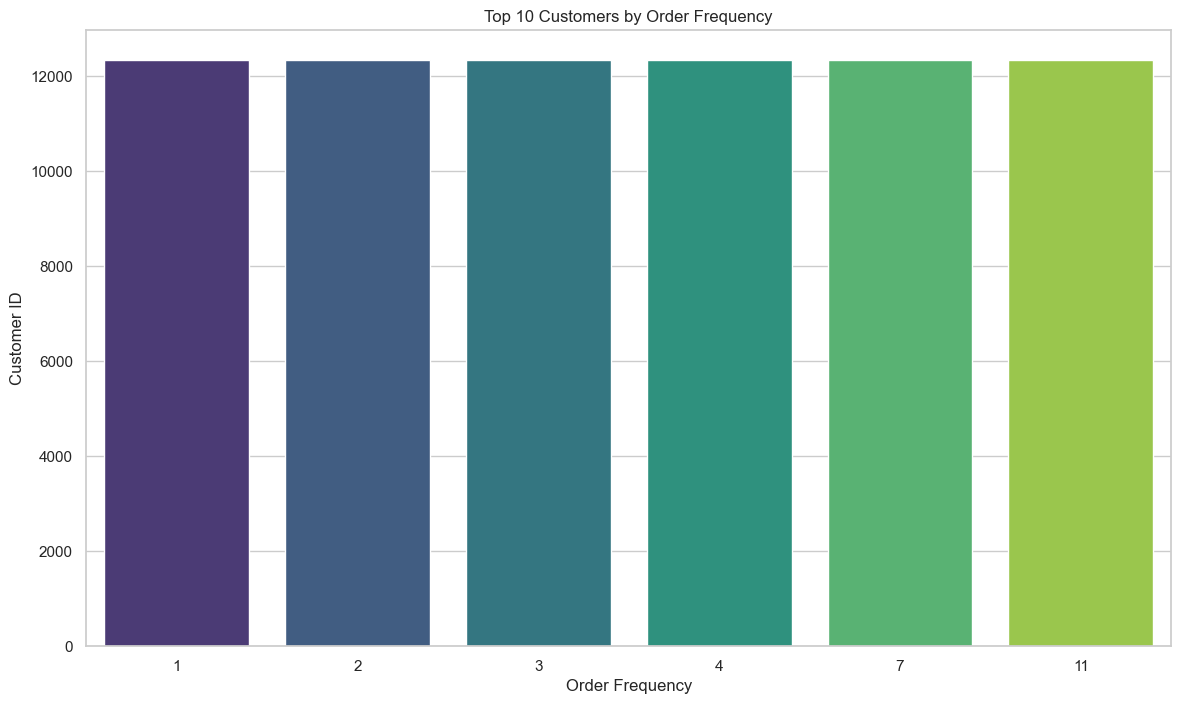

In [382]:
# Visualization of order frequency by customer (Top 10)
plt.figure(figsize=(14, 8))
sns.barplot(data=customer_order_frequency.head(10), x='OrderFrequency', y='CustomerID', palette='viridis')
plt.title('Top 10 Customers by Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Customer ID')
plt.show()

In [390]:
# Calculate the number of orders per region (country)
region_order_frequency = df_cleaned.groupby('Country')['InvoiceNo'].nunique().reset_index()
region_order_frequency.columns = ['Country', 'OrderFrequency']
region_order_frequency.head(10)

,Country,OrderFrequency
0,Australia,69
1,Austria,19
2,Bahrain,2
3,Belgium,119
4,Brazil,1
5,Canada,6
6,Channel Islands,33
7,Cyprus,20
8,Czech Republic,5
9,Denmark,21


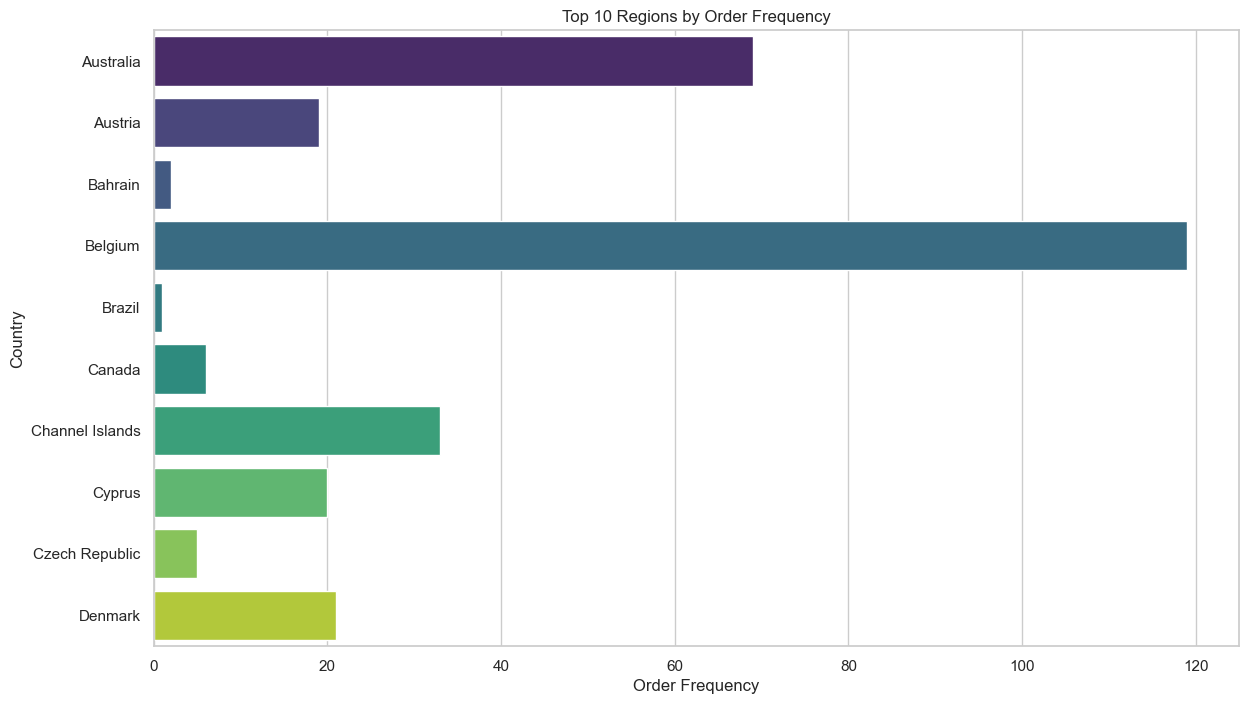

In [391]:
# Visualization of order frequency by region (Top 10)
plt.figure(figsize=(14, 8))
sns.barplot(data=region_order_frequency.head(10), x='OrderFrequency', y='Country', palette='viridis')
plt.title('Top 10 Regions by Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Country')
plt.show()